1) Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.

In [127]:
import numpy as np
import math
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

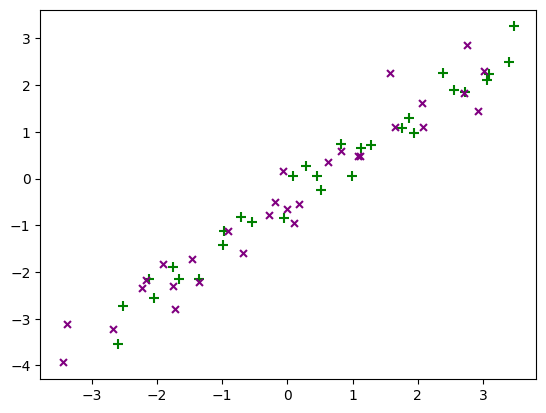

In [38]:
x = np.linspace(-3, 3, 10) + np.random.rand(1,3,10)
y = x - np.random.rand(1,3,10)

fig, axes = plt.subplots()
axes.scatter(x, y, color = "green", s = 50, marker='+' )
axes.scatter(x-np.random.rand(1,3,10), y-np.random.rand(1,3,10),  color="purple", s = 25, marker='x' )
#plt.show() 

2. Vykreslete 3D graf s funkcí....


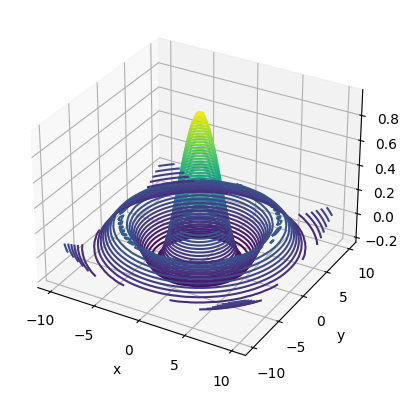

In [132]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2)) / np.sqrt(x ** 2 + y ** 2)

x = np.linspace(-10, 10, 40)
y = np.linspace(-10, 10, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.contour(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

3. Vykreslete polar graf s funkcí r = 2sin(3o) Použijte funkci plot a nastavte barvu, osy a titulek.

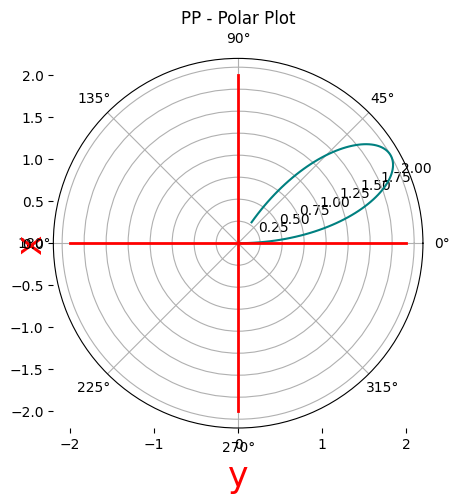

In [204]:
def r(ot):
    return 2 * np.sin(3*ot)
ot = np.linspace(0,1,100)

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(ot, r(ot), color = 'teal')
ax.set_title("PP - Polar Plot", fontsize = 12)
ax.set_xlabel('y', fontsize = 25, color = 'red')
ax.set_ylabel('x', fontsize = 25, color = 'red')

ax2 = fig.add_axes(ax.get_position(), frameon=False) #snad jsem to s temi osami pochopil spravne
ax2.plot([-2, 2], [0, 0], color='red', linewidth=2)
ax2.plot([0, 0], [-2, 2], color='red', linewidth=2)

#ax.plot([0, 0], [0, 2], color='yellow', linewidth=3) # alternativni metoda
plt.show() 

4.Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.

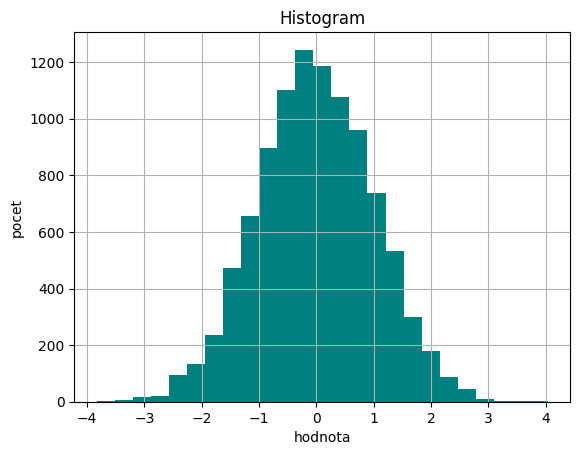

In [257]:
fig = plt.figure()
n = np.random.randn(10000)
ax = plt.hist(n, bins=25, color = 'teal')
plt.title('Histogram')
plt.xlabel('hodnota')
plt.ylabel('pocet')
plt.grid(True)
plt.show()